In [ ]:
import numpy as np
def selfAttention(Q,K,V):
  dk = np.dim(K)
  Attention = (np.matmul(Q,K))/dk




In [ ]:
arr = np.array([[1,2,3],[3,4,5],[6,7,8]])


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def evenpos(i,j,d_model):
  return np.sin(i/10000**(2*j/d_model))
def oddpos(i,j,d_model):
  return np.cos(i/10000**(2*j/d_model))

def PositionEncoding(max_len,d_model,n=10000):
  arr = np.zeros([max_len,d_model])
  for k in range(max_len):
    for i in range(0,d_model,2):
      denominator = np.power(n,2*i/d_model)
      arr[k,i] = evenpos(k,i,d_model)
      arr[k,i+1] = oddpos(k,i,d_model)
  return arr



[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.00000000e+00
   0.00000000e+00  1.00000000e+00]
 [ 8.41470985e-01  5.40302306e-01  8.01961795e-01 ...  1.00000000e+00
   1.07460783e-08  1.00000000e+00]
 [ 9.09297427e-01 -4.16146837e-01  9.58144376e-01 ...  1.00000000e+00
   2.14921566e-08  1.00000000e+00]
 ...
 [ 3.79607739e-01 -9.25147537e-01  7.45109484e-01 ...  1.00000000e+00
   1.04236959e-06  1.00000000e+00]
 [-5.73381872e-01 -8.19288245e-01 -8.97521193e-02 ...  1.00000000e+00
   1.05311567e-06  1.00000000e+00]
 [-9.99206834e-01  3.98208804e-02 -8.52340887e-01 ...  1.00000000e+00
   1.06386175e-06  1.00000000e+00]]


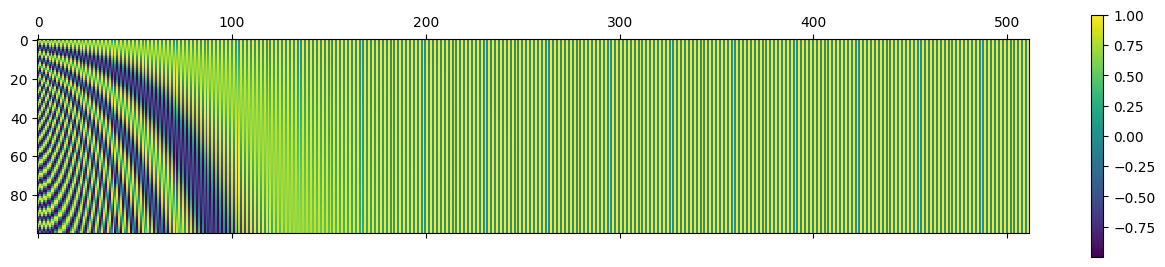

In [ ]:
arr = PositionEncoding(max_len = 100, d_model = 512, n = 10000)
print(arr)
cax = plt.matshow(arr)
plt.colorbar(cax)
plt.show()

In [ ]:
import math as mt
import torch.nn as nn
from torch import Tensor

class Embedding(nn.Module):
  def __init__(self,vocab_size: int, dim_embed: int)-> None:
    super().__init__()
    self.embedding = nn.Embedding(vocab_size,dim_embed)
    self.sqrt_dim_embed = mt.sqrt(dim_embed)
  def forward(self, x: Tensor) -> Tensor:
    x = self.embedding(x.long())
    x = self.sqrt_dim_embed(x)
    return x



In [ ]:
class Embedding(nn.Module):
  def __init__(self,vocab_size: int,dim_embed: int)->None:
    super().__init__()
    self.embedding = nn.Embedding(vocab_size,dim_embed)
    self.sqrt_dim_embed = mt.sqrt(dim_embed)
  def forward(self,x:Tensor)-> Tensor:
    x = self.embedding(x.long())
    x = x*self.sqrt_dim_embed
    return x


In [ ]:
import torch
import torch.nn as nn

# Define the embedding layer
embedding = Embedding(vocab_size=4, dim_embed=3)

# Example indices
input_indices = torch.tensor([0,2,1,3,3,2,2,2,2], dtype=torch.long)  # Input tensor for indices 0 and 2

# Get embeddings
embeddings = embedding(input_indices)
print(embeddings)


tensor([[-0.0535,  1.3001, -1.4354],
        [ 2.0720,  0.0472, -1.9047],
        [-2.0743,  1.7285,  1.0077],
        [ 0.7708, -0.0562, -3.4704],
        [ 0.7708, -0.0562, -3.4704],
        [ 2.0720,  0.0472, -1.9047],
        [ 2.0720,  0.0472, -1.9047],
        [ 2.0720,  0.0472, -1.9047],
        [ 2.0720,  0.0472, -1.9047]], grad_fn=<MulBackward0>)


In [ ]:
# # atleast I am done with the embeddings
# import math as mt
# impor numpy as np
# import torch
# from torch import Tensor

# pos_enc = torch.zeros(max_len,dim_embed)
# for pos in range(max_len):
#   for i in range(0,dim_embed,2):
#     pos_enc[pos,i] = np.sin(pos/10000**(2*i/dim_embed))
#     pos_enc[pos,i+1] = np.cos(pos/10000**(2*i/dim_embed))
# return pos_enc


# But this is not efficint because of two loops

#So may be we can try smtg





In [ ]:
# let us make a small model
import torch.nn as nn
from torch import Tensor
class TinyModel(nn.Module):
  def __init__(self):
    super(TinyModel,self).__init__()
    self.linear1 = nn.Linear(100,200)
    self.activation = nn.ReLU()
    self.linear2 = nn.Linear(200,10)
    self.softmax = nn.Softmax()

  def forward(self,x:Tensor)-> Tensor:
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    x = self.softmax(x)
    return x





In [ ]:
tinymodel = TinyModel()
input = torch.ones([1,100])
output = tinymodel(input)
print(output)

tensor([[0.1036, 0.0976, 0.0775, 0.0883, 0.1212, 0.1143, 0.1236, 0.0591, 0.0900,
         0.1248]], grad_fn=<SoftmaxBackward0>)


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1511: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


In [ ]:
# Let us do positional Encoding with classes as the two for loops might take time for many pos encodings
class PositionEncoding(nn.Module):
  def __init__(self,max_pos:int,dim_emb:int,drop_prob:float)->None:
    super(PositionEncoding,self).__init()

    position = torch.arange(0,max_pos).unsqueeze(1)
    dim_pair = torch.arange(0,dim_emb,2).unsqueeze(0)
    div_term = np.exp(dim_pair*-(mt.log(10000)/dim_emb))

    pe = torch.zeros(max_pos,dim_emb)
    pe[:,0::2] = torch.sin(position*div_term)
    pe[:,1::2] = torch.cos(position*div_term)

    pe = pe.unsqueeze(0)
    # this adds a dimenio to the tensor and makes it in the x axis

    self.register_buffer("pe",pe) #making it non learnable and then storing

    self.dropout = nn.Dropout(p=drop_prob)

  def forward(self,x:Tensor)->Tensor:
    max_seq_len = x.size(dim =1)
    x = x+self.pe[:,:max_seq_len]
    x = self.dropout(x)
    return x

In [ ]:
# scaled dot product attention
def attention(Q:Tensor,K:Tensor,V:Tensor,mask : Tensor = None)-> Tensor:
  attention = np.matmul(Q,K.transpose)
  dim_k = mt.sqrt**K.size(1)
  attention = attention*(1/dim_k)
  if mask is not None:
    attention = attention.masked_fill(mask==0,1e-9)

  weights = torch.nn.functional.softmax(attention,dim = -1 )


  values = np.matmul(weights*V)
  return values


In [ ]:
x= torch.ones(2,3)
x.size()

torch.Size([2, 3])

In [ ]:
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
x.transpose(0,1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
x.transpose(-2,-1)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])

In [ ]:
# let us learn about masking afterwards and go on to multihead attention
class MultiHeadAttention(nn.Module):
  def __init__(self,num_heads:int,dim_emb:int,drop_prob:float)->None:
    super().__init()
    assert dim_emb % num_heads == 0
    self.num_heads = num_heads
    self.dim_emb = dim_emb
    self.dim_heads = dim_emb//num_heads

    self.query = nn.Linear(dim_emb,dim_emb)
    self.key = nn.Linear(dim_emb,dim_emb)
    self.value = nn.Linear(dim_emb,dim_emb)
    self.droupout = nn.Dropout(p = drop_prob)
    self.output = nn.Linear(dim_emb,dim_emb)

  def forward(self, x:Tensor, y: Tensor, mask: Tensor = None)-> Tensor:
    query = self.query(x)
    key = self.query(y)
    value = self.query(y)

    batch_size = x.size(0)

    query = query.view(batch_size,-1,self.num_heads,self.dim_heads)
    key   = key.view(batch_size,-1,self.num_heads,self.dim_heads)
    value = value.view(batch_size,-1,self.num_heads,self.dim_heads)


    query = query.transpose(1,2)
    key = key.transpose(1,2)
    value = value.transpose(1,2)

    if mask is not None:
      mask  = mask.unsqueeze(1)

    attention = attention(query,key,value,mask = None)

    attention = attention.transpose(1,2).contiguous().view(batch_size,-1,self.dim_emb)

    out = self.droupout(self.output(attention))

    return out

In [ ]:
class PositionwiseFeedForward(nn.Module):
  def __init__(self,dim_emb:int,dim_pffn:int,drop_prob:float)->None:
    super().__init()

  #   self.Linear1 = nn.Linear(dim_emb,dim_pffn)
  #   self.activation = nn.ReLU()
  #   self.Linear2 = nn.Linear(dim_pffn,dim_emb)
  #   self.dropout = nn.Dropout(p=drop_prob)

  # def forward(self,x:Tensor)->Tensor:
  #   x = self.Linear1(x)
  #   x = self.activation(x)
  #   x = self.dropout(x)
  #   x = self.Linear2(x)
  #   x  = self.dropout(x)

    self.pffn = nn.Sequential(nn.Linear(dim_emb,dim_pffn),nn.ReLU(inplace = True),
                              nn.Dropout(p=drop_prob),nn.Linear(dim_pffn,dim_emb)
                              ,nn.Dropout(p=drop_prob))
  def forward(self,x:Tensor)->Tensor:
    x = self.pffn(x)
    return x

# these are the two methods we can use to define a model in pyTorch


In [ ]:
# now we will define a encoder which will have amny encoder blocks and decoder which will have many decoder blocks
class Encoder(nn.Module):
  def __init__(self,num_blocks:int,num_heads:int,dim_emb:int,dim_pffn:int,drop_prob:float)->None:
    super().__init__()

    self.blocks = nn.ModuleList(
        Encoderblock(num_heads,dim_emb,dim_pffn,drop_prob) for _ in range(num_blocks)
    )
    self.layernorm = nn.LayerNorm(dim_emb)
  def forward(self,x:Tensor,x_mask = Tensor)-> Tensor:
    for block in self.blocks:
      x = block(x,x_mask)
    x = x.layer_norm(x)
    return x


In [ ]:
class Encoderblock(nn.Module):
  def __init__(self,num_heads:int,dim_emb:int,dim_pffn:int,drop_prob:float)->None:
    super().__init__()

    self.self_attn1 = MultiHeadAttention(num_heads,dim_emb,drop_prob)
    self.layernorm1 = nn.LayerNorm(dim_emb)

    self.feedforward = PositionwiseFeedForward(dim_emb,dim_pffn,drop_prob)
    self.layernorm2 = nn.LayerNorm(dim_emb)

  def forward(self,x:Tensor,x_mask:Tensor)->Tensor:
    x = self.layernorm1(x)
    x = x + self.self_attn1(x,x_mask)
    x = self.layernorm2(x)
    x = x + self.feedforward(x)
    return x

In [ ]:
class decoder(nn.Module):
  def __init__(self,num_blocks:int,dim_emb:int,dim_pffn:int,drop_prob:float)->None:
    super().__init__()
    self.blocks = nn.ModuleList([Decoderblocks(dim_emb,dim_pffn,drop_prob) for _ in range(num_blocks)])
    self.layernorm = nn.LayerNorm(dim_emb)

  def forward(self,x:Tensor,x_mask:Tensor,y:Tensor,y_mask:Tensor)->Tensor:
    for block in self.blocks:
      y = block(y,y_mask,x,x_mask)
    y = self.layernorm(y)
    return y

In [ ]:
class Decoderblocks(nn.Module):
  def __init__(self,num_blocks:int,dim_emb:int,dim_pffn:int,drop_prob:float)->None:
    super()._init__()


In [ ]:
import numpy as np

input = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15]
])


In [ ]:
mean_value = input.mean((-2, -1))
print(mean_value)


8.0


In [ ]:
import torch

# Inputs
x = torch.tensor([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]], dtype=torch.float32)

# Layer normalization parameters
epsilon = 1e-5
gamma = torch.ones(x.shape[-1])
beta = torch.zeros(x.shape[-1])

In [ ]:
print(gamma)

tensor([1., 1., 1.])


In [ ]:
import math

class MultiHeadAttention(nn.Module):
  def __init__(self,d_model,num_heads):
    super().__init()
    assert d_model % num_heads == 0

    self.d_model = d_model
    self.num_heads = num_heads
    self.d_k = self.d_model//self.num_heads

    self.W_q = nn.Linear(d_model,d_model)
    self.W_k = nn.Linear(d_model,d_model)
    self.W_v = nn.Linear(d_model,d_model)
    self.W_o = nn.Linear(d_model,d_model)

  def scaled_dot_product_attention(self,Q,K,V,mask = None):

    attn_scores = np.matmul((Q,K.transpose(-2,-1))/math.sqrt(self.d_k))

    if mask is not None:
      attn_scores = attn_scores.masked_fill_(mask == 0,1e-9)

    attn_scores = torch.softmax(attn_scores,dim=-1)
    output = np.matmul(attn_scores,V)

    return output

  def split_heads(self,x):
    batch_size, seq_len,d_model = x.size()

    return x.view(batch_size,seq_len,self.num_heads,self.d_k).transpose(1,2)


  def combine_heads(self,x):
    batch_size, _, seq_len,d_k = x.size()

    return x.transpose(1,2).contiguous().view(batch_size,seq_len,self.d_model)

  def forward(self,Q,K,V):
    Q = self.split_heads(self.W_q(Q))
    K = self.split_heads(self.W_q(K))
    V = self.split_heads(self.W_q(V))

    split_attn = self.scaled_dot_product_attention(Q,K,V,mask = None)

    output = self.W_o(self.combine_heads(split_attn))
    return output

In [ ]:
class PositionwiseFeedForward(nn.Module):
  def __init__(self,d_model,d_pffn):
    super().__init()
    self.linear1 = nn.Linear(d_model,d_pffn)
    self.activation = nn.ReLU()
    self.linear2 = nn.Linear(d_pffn,d_model)

  def forward(self,x):
    x = self.linear1(x)
    x = self.activation(x)
    x = self.linear2(x)
    return x

In [ ]:
class positionEncoding(nn.Module):
  def __init__(self,max_seq_len,d_model):
    super().__init__()

    pos_enc = torch.zeros(max_seq_len,d_model)

    position = torch.arange(0,max_seq_len,dtype = torch.float).unsqueeze(1)
    div_term = torch.exp(torch.arange(0,d_model,2).float()*(-math.log(10000)/d_model))

    pos_enc[:,0:2] = torch.sin(position,div_term)
    pos_enc[:,1:2] = torch.cos(position,div_term)

    self.register("pos_enc",pos_enc.unsqueeze(0))

  def forward(self,x):
    x =x+self.pos_enc[:,x.size(1)]
    return x


In [ ]:
class EncoderLayer(nn.Module):
  def __init__(self,num_heads,d_model,d_pffn,drop_prob):
    super().__init__()

    self.self_attn = MultiHeadAttention(d_model,num_heads)
    self.feed_forward = PositionwiseFeedForward(d_model,d_pffn)
    self.norm1 = nn.LayerNorm(d_model)
    self.norm2 = nn.LayerNorm(d_model)
    self.dropout = nn.Dropout(drop_prob)

  def forward(self,x,mask):
    attn_output = self.self_attn(x,x,x,mask)

    x = self.norm1(x+self.dropout(attn_output))

    ff_output = self.feed_forward(x)

    x = self.norm2(x+self.dropout(ff_output))

    return x


In [ ]:
class DecoderLayer(nn.Module):
  def __init__(self,d_model,num_heads,d_pffn,drop_prob):
    super().__init__()

    self.self_attn = MultiHeadAttention(d_model,num_heads)
    self.cross_attn = MultiHeadAttention(d_model,num_heads)
    self.norm1 = nn.Linear(d_model)
    self.norm2 = nn.Linear(d_model)
    self.norm3 = nn.Linear(d_model)
    self.dropout = nn.Dropout(drop_prob)
    self.feed_forward = nn.PositionwiseFeedForward(d_model,d_pffn)

  def forward(self,x_dec,enc_out,src_msk,tgt_msk):
    attn_output = self.self_attn(x_dec,x_dec,x_dec,tgt_msk)

    x = self.norm1(x+self.dropout(attn_output))

    attn_output = self.cross_attn(x_dec,enc_out,enc_out,src_msk)

    x = self.norm2(x+self.dropout(attn_output))

    ff_output = self.feed_forward(x)

    x = self.norm3(x+self.dropout(ff_output))
    return x

In [ ]:
class Transformer(nn.Module):
  def __init__(self,src_vocabsize,tgt_vocabsize,num_layers,num_heads,d_model,d_pffn,max_seqlen,drop_prob):
    super().__init__()

    self.enc_embed = nn.Embedding(src_vocabsize,d_model)
    self.dec_embed = nn.Embedding(tgt_vocabsize,d_model)

    self.pos_enc = positionEncoding(max_seqlen,d_model)

    self.enc_layers = nn.ModuleList([EncoderLayer(num_heads,d_model,d_pffn,drop_prob) for _ in range(num_layers)])
    self.dec_layers = nn.ModuleList([DecoderLayer(num_heads,d_model,d_pffn,drop_prob) for _ in range(num_layers)])

    self.dropout = nn.Dropout(drop_prob)
    self.fc = nn.Linear(d_model,tgt_vocabsize)

  def generate_mask(self, src, tgt):
    src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
    tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
    seq_length = tgt.size(1)
    nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool()
    tgt_mask = tgt_mask & nopeak_mask
    return src_mask, tgt_mask

  def forward(self,src, tgt):
    src_mask, tgt_mask = self.generate_mask(src,tgt)

    src_embedding = self.dropout(self.pos_enc(self.enc_embed(src)))
    tgt_embedding = self.dropout(self.pos_enc(self.dec_embed(tgt)))

    enc_output = src_embedding

    for enc_layer in self.enc_layers:
      enc_output = enc_layer(enc_output,src_mask)

    dec_output = tgt_embedding

    for dec_layer in self.dec_layers:
      dec_output = dec_layer(dec_output,enc_output,src_mask,tgt_mask)

    output = self.fc(dec_output)

    return output





